## Tech & Engineering - Raniya
Follow along the code to do the preliminary data analysis!\
**Please refer to the [meeting notes here](https://docs.google.com/document/d/1tnDnYfO5m5GQz5Fm7_TbpzHN9bG3RmvqpgvL4TyOevI/edit?usp=sharing) to get familiar with all the column names and the values associated with them.**

### Step 1: Install the necessary libraries for our data collection.
[yfinance](https://python-yahoofinance.readthedocs.io/en/latest/): used to fetch historical stock data (price, volume, etc.) from Yahoo Finance for our assigned sectors.\
[ta](https://technical-analysis-library-in-python.readthedocs.io/en/latest/): used to calculate technical indicators from the price data we get with yfinance. These indicators help our model understand:
- Trends (e.g., SMA, EMA, MACD)
- Momentum (e.g., RSI)
- Volatility (e.g., ATR, Bollinger Bands)
- Volume pressure (e.g., OBV)

In [1]:
!pip install yfinance
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6a8376ff424c5ec94282e8da8d5ab2735315f10e58d0dc9093ef702b80b51f2b
  Stored in directory: /Users/raniyakhan/Library/Caches/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


### Step 2: Import the necessary libraries

In [2]:
import yfinance as yf
import pandas as pd
import time
import ta

### Step 3: Collect Preliminary Stock Data Using `yfinance`

In this step, you will collect **5 years of historical daily stock data** for your assigned sector using the `yfinance` library.

**What this code does:**
- Loops through a list of stock tickers.
- Uses `yfinance` to download daily data for each stock over a 5-year period.
- Waits 3 seconds between requests to avoid hitting API limits.
- Cleans and formats the data: resets the index and adds a "Ticker" column.
- Stores all the data in one master DataFrame called `price_df`.

**What you need to do:**
- Replace the `tickers` list with the stocks **assigned to your sector**.
- You can find your list of stocks by referring to the excel file we created earlier [here](https://docs.google.com/spreadsheets/d/19n8ye_mwPM6QVbFJjG4eVUfiqUiGMQ-MujnMY_zMUs8/edit?usp=sharing).
- Run the code block to create your `price_df`, which you will later use for feature engineering.

If no data is found or an error occurs for a ticker, it will be skipped and reported in the output.\

*If you are running into errors with `yfinance` and hitting api limits, please wait a few hours and try running the code again. Please avoing running the cell multiple times to not run into this issue!*

Below is the code you should run (after customizing your ticker list):

In [5]:
# Refer back to the csv file to find the stocks you selected, and replace these tickers with your own.
tickers = [
    "AAPL","MSFT","GOOGL", "AMZN", "NVDA", "META", "TSLA", "TSM","AVGO", "ORCL", "CSCO", "INTC", "ADBE",
"CRM",
"IBM",
"TXN",
"ASML",
"QCOM",
"HON",
"SIEGY",
"SEZL",
"IDCC",
"AGYS",
"BOX",
"ZETA",
"YOU"
]

#CODE BELOW DOES NOT NEED TO BE CHANGED
# List to hold all data
all_data = []

# Loop through each ticker
for ticker in tickers:
    try:
        df = yf.Ticker(ticker).history(period="5y", interval="1d")
        time.sleep(3) # wait in between requests to avoid request limits
        if df.empty:
            print(f"No data for {ticker}")
            continue

        df = df.reset_index()  # Convert index to Date column
        df["Ticker"] = ticker  # Add ticker column
        all_data.append(df[["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]])
        print(f"{ticker} added")
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")

# Concatenate all into one DataFrame
price_df = pd.concat(all_data, ignore_index=True)

# Preview the result
print(price_df.head())

AAPL added
MSFT added
GOOGL added
AMZN added
NVDA added
META added
TSLA added
TSM added
AVGO added
ORCL added
CSCO added
INTC added
ADBE added
CRM added
IBM added
TXN added
ASML added
QCOM added
HON added
SIEGY added
SEZL added
IDCC added
AGYS added
BOX added
ZETA added
YOU added
                       Date Ticker       Open       High        Low  \
0 2020-04-06 00:00:00-04:00   AAPL  60.888178  63.851287  60.519308   
1 2020-04-07 00:00:00-04:00   AAPL  65.717481  65.935898  62.853871   
2 2020-04-08 00:00:00-04:00   AAPL  63.761500  64.885106  63.395060   
3 2020-04-09 00:00:00-04:00   AAPL  65.207845  65.540314  64.237129   
4 2020-04-13 00:00:00-04:00   AAPL  65.113192  66.421235  64.511346   

       Close     Volume  
0  63.695976  201820400  
1  62.958221  202887200  
2  64.569626  168895200  
3  65.035538  161834800  
4  66.312027  131022800  


### Step 4: Generate Price-Based and Technical Indicators

Now that you have your stock data, it’s time to create additional features that help the model understand market trends, volatility, and momentum.

**What this code does:**
- Calculates **daily returns** and **VWAP** (volume-weighted average price).
- Adds several **technical indicators** like:
  - Simple and Exponential Moving Averages (SMA, EMA)
  - Relative Strength Index (RSI)
  - MACD and Signal Line
  - Bollinger Bands (Upper and Lower)
  - Average True Range (ATR)
  - On-Balance Volume (OBV)
- Groups the data by ticker to apply indicator calculations correctly.
- Combines everything into a single DataFrame with all features.

**What you need to do:**
- You **do not need to modify anything** in this code block **except one thing**:
  - In the **last line**, rename the CSV file to reflect your assigned sector name:
    ```python
    tech_df.to_csv("your_sector_name_data_with_indicators.csv", index=False)
    ```

Once this is done, you’ll have a feature-rich dataset ready for modeling!

In [6]:
tech_df = price_df.copy()

# --- Price-based indicators ---
tech_df['Daily Return'] = tech_df.groupby("Ticker")['Close'].pct_change(fill_method=None)
tech_df['Typical Price'] = (tech_df['High'] + tech_df['Low'] + tech_df['Close']) / 3
tech_df['VWAP'] = (tech_df['Typical Price'] * tech_df['Volume']).groupby(tech_df['Ticker']).cumsum() / tech_df['Volume'].groupby(tech_df['Ticker']).cumsum()

# --- Technical indicators ---
grouped = tech_df.groupby("Ticker", group_keys=False)
tech_df['SMA_20'] = grouped['Close'].apply(lambda x: x.rolling(window=20).mean())
tech_df['EMA_20'] = grouped['Close'].apply(lambda x: x.ewm(span=20, adjust=False).mean())
tech_df['RSI_14'] = grouped['Close'].apply(lambda x: ta.momentum.RSIIndicator(close=x, window=14).rsi())
tech_df['MACD'] = grouped['Close'].apply(lambda x: ta.trend.MACD(close=x).macd())
tech_df['MACD_Signal'] = grouped['Close'].apply(lambda x: ta.trend.MACD(close=x).macd_signal())
tech_df['BB_Upper'] = grouped['Close'].apply(lambda x: ta.volatility.BollingerBands(close=x, window=20).bollinger_hband())
tech_df['BB_Lower'] = grouped['Close'].apply(lambda x: ta.volatility.BollingerBands(close=x, window=20).bollinger_lband())
# Create empty columns
tech_df['ATR'] = None
tech_df['OBV'] = None

# Loop through each group (ticker) and calculate indicators
result_frames = []

for ticker, group in tech_df.groupby("Ticker"):
    group = group.copy()
    group.sort_values('Date', inplace=True)

    # ATR
    atr = ta.volatility.AverageTrueRange(
        high=group['High'],
        low=group['Low'],
        close=group['Close']
    ).average_true_range()
    group['ATR'] = atr

    # OBV
    obv = ta.volume.OnBalanceVolumeIndicator(
        close=group['Close'],
        volume=group['Volume']
    ).on_balance_volume()
    group['OBV'] = obv

    result_frames.append(group)

# Combine the updated groups back together
tech_df = pd.concat(result_frames, ignore_index=True)

# Save to CSV, rename it to correspond to your sector. Please replace "sector" with your corresponding sector.
tech_df.to_csv("tech_engineering_data_with_indicators.csv", index=False)

## Exploratory Data Analysis (EDA)

Load the csv you just created, and give it a name. Replace the csv name (what is in quoets ""), with the csv you created above.

In [3]:
techeng_df = pd.read_csv("tech_engineering_data_with_indicators.csv")
techeng_df.head() #shows first 5 rows of data frame

,Date,Ticker,Open,High,Low,Close,Volume,Daily Return,Typical Price,VWAP,SMA_20,EMA_20,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Lower,ATR,OBV
0,2020-04-06 00:00:00-04:00,AAPL,60.888178,63.851287,60.519308,63.695976,201820400,NaN,62.688857,62.688857,NaN,63.695976,NaN,NaN,NaN,NaN,NaN,0.0,201820400
1,2020-04-07 00:00:00-04:00,AAPL,65.717481,65.935898,62.853871,62.958221,202887200,-0.011582,63.915997,63.304044,NaN,63.625714,NaN,NaN,NaN,NaN,NaN,0.0,-1066800
2,2020-04-08 00:00:00-04:00,AAPL,63.761500,64.885106,63.395060,64.569626,168895200,0.025595,64.283264,63.592372,NaN,63.715610,NaN,NaN,NaN,NaN,NaN,0.0,167828400
3,2020-04-09 00:00:00-04:00,AAPL,65.207845,65.540314,64.237129,65.035538,161834800,0.007216,64.937660,63.888406,NaN,63.841318,NaN,NaN,NaN,NaN,NaN,0.0,329663200
4,2020-04-13 00:00:00-04:00,AAPL,65.113192,66.421235,64.511346,66.312027,131022800,0.019628,65.748203,64.169637,NaN,64.076623,NaN,NaN,NaN,NaN,NaN,0.0,460686000


In [4]:
!pip install seaborn

In [5]:
# Data Handling
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings for nicer visuals
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)

### EDA Guidelines

Follow these steps to explore and understand your dataset before modeling. This will help uncover patterns, identify issues, and engineer features that improve performance.

**Resources (Videos):**
- [Learn EDA - Playlist](https://www.youtube.com/watch?v=78ut-S-QOEQ&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&ab_channel=MarkKeith)
- [Complete Exploratory Data Analysis And Feature Engineering In 3 Hours| Krish Naik](https://youtu.be/fHFOANOHwh8?si=1SRsxlRJpOlUGMhI)
- [How to Do Data Exploration (step-by-step tutorial on real-life dataset)](https://youtu.be/OY4eQrekQvs?si=i1QzaMrCFQmxg1uJ)

#### 1) Get Rid of Any Null Values If You Have Any

- First, check for missing (`NaN`) values across all columns.
- If there are only a few missing entries, drop them.
- **Resource**: [A Guide to Handling Missing values in Python](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python)

```python
# Check for null values
df.isnull().sum()

# Drop rows with any nulls (simple but aggressive)
df = df.dropna()

In [7]:
techeng_df.isnull().sum()
techeng_df = techeng_df.dropna()

#### 2) Inspect Your Overall Cleaned Dataset Using Summary Statistics
- Use `.info()` and `.describe()` to understand the shape, datatypes, and distributions of the dataset.
- This gives a high-level snapshot of numeric features and potential outliers or irregularities.
- **Resource:**: [An Introduction To Summary Statistics In Python (With Code Examples)](https://zerotomastery.io/blog/summary-statistics-in-python/)

In [9]:
# Preview data
print(techeng_df.head())
print(techeng_df.info())

# Check missing values
print(techeng_df.isnull().sum())

# Basic statistics
print(techeng_df.describe())


                         Date Ticker       Open       High        Low  \
33  2020-05-22 00:00:00-04:00   AAPL  76.838190  77.680138  76.735993   
34  2020-05-26 00:00:00-04:00   AAPL  78.719190  78.899256  77.015838   
35  2020-05-27 00:00:00-04:00   AAPL  76.928236  77.553603  76.186057   
36  2020-05-28 00:00:00-04:00   AAPL  77.081533  78.704588  76.804134   
37  2020-05-29 00:00:00-04:00   AAPL  77.684988  78.147325  77.008514   

        Close     Volume  Daily Return  Typical Price       VWAP     SMA_20  \
33  77.597404   81803200      0.006438      77.337845  70.425536  73.790004   
34  77.071808  125522000     -0.006773      77.662301  70.600251  74.207624   
35  77.407600  112945200      0.004357      77.049087  70.737365  74.697727   
36  77.441673  133560800      0.000440      77.650132  70.906908  75.078510   
37  77.366219  153532400     -0.000974      77.507353  71.087895  75.381866   

       EMA_20     RSI_14      MACD  MACD_Signal   BB_Upper   BB_Lower  \
33  74.032111

In [11]:
techeng_df.head()

,Date,Ticker,Open,High,Low,Close,Volume,Daily Return,Typical Price,VWAP,SMA_20,EMA_20,RSI_14,MACD,MACD_Signal,BB_Upper,BB_Lower,ATR,OBV
33,2020-05-22 00:00:00-04:00,AAPL,76.838190,77.680138,76.735993,77.597404,81803200,0.006438,77.337845,70.425536,73.790004,74.032111,69.861769,2.595594,2.587978,79.847500,67.732509,1.896393,930792800
34,2020-05-26 00:00:00-04:00,AAPL,78.719190,78.899256,77.015838,77.071808,125522000,-0.006773,77.662301,70.600251,74.207624,74.321606,66.916461,2.520338,2.574450,79.952840,68.462407,1.895466,805270800
35,2020-05-27 00:00:00-04:00,AAPL,76.928236,77.553603,76.186057,77.407600,112945200,0.004357,77.049087,70.737365,74.697727,74.615510,67.849045,2.459442,2.551449,79.735301,69.660153,1.857758,918216000
36,2020-05-28 00:00:00-04:00,AAPL,77.081533,78.704588,76.804134,77.441673,133560800,0.000440,77.650132,70.906908,75.078510,74.884668,67.947777,2.386422,2.518443,79.721389,70.435630,1.860807,1051776800
37,2020-05-29 00:00:00-04:00,AAPL,77.684988,78.147325,77.008514,77.366219,153532400,-0.000974,77.507353,71.087895,75.381866,75.121006,67.453772,2.295997,2.473954,79.783927,70.979805,1.809236,898244400


#### 3) Create Plots to Explore Distributions
Plot histograms and KDE plots to check how features like RSI, MACD, and Volume, etc. are distributed. This helps you spot skewness, spikes, and potential transformations.
**Resources**: 
- [Seaborn Kdeplot - A Comprehensive Guide](https://www.digitalocean.com/community/tutorials/seaborn-kdeplot)
- [Python Histogram Plotting: NumPy, Matplotlib, pandas & Seaborn](https://realpython.com/python-histograms/)

<Figure size 600x400 with 0 Axes>

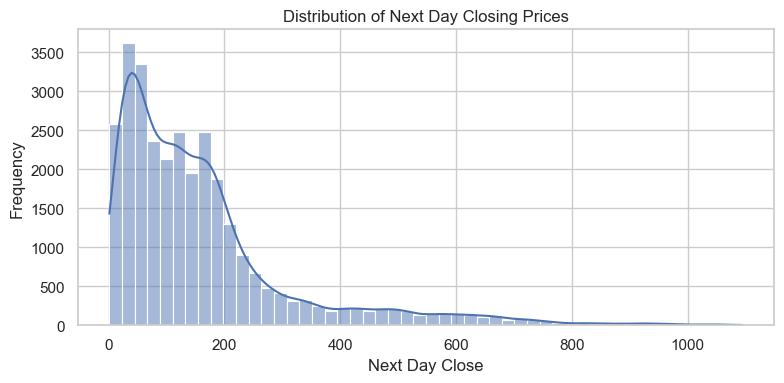

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

techeng_df['Next_Close'] = techeng_df.groupby('Ticker')['Close'].shift(-1)

plt.figure(figsize=(8, 4))
sns.histplot(techeng_df['Next_Close'].dropna(), kde=True, bins=50)
plt.title('Distribution of Next Day Closing Prices')
plt.xlabel('Next Day Close')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### 4) Generate a Correlation Heatmap to Spot Redundant Features
Highly correlated features can be redundant and may hurt certain models. Use a heatmap to visually inspect correlation between numerical features.
- **Resource**: [5 Minute EDA: Correlation Heatmap](https://medium.com/5-minute-eda/5-minute-eda-correlation-heatmap-b57bbb7bae14)

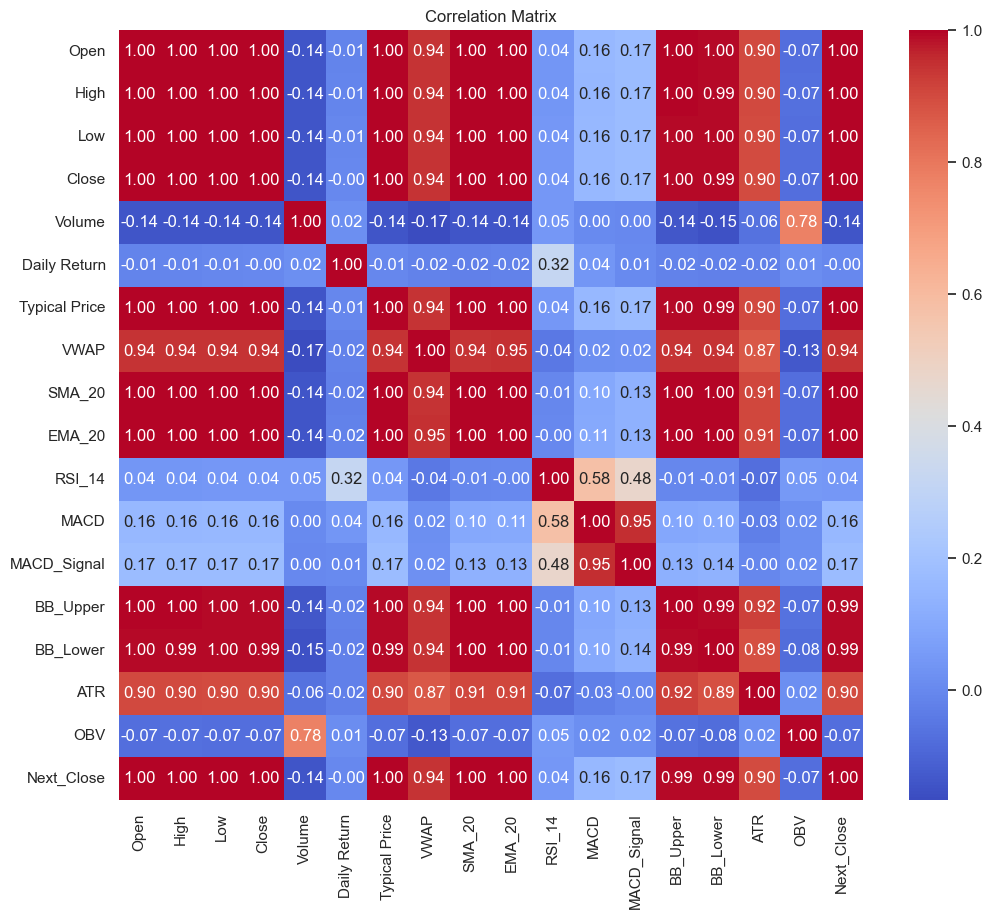

In [13]:
plt.figure(figsize=(12, 10))
corr = techeng_df.drop(columns=['Date', 'Ticker']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


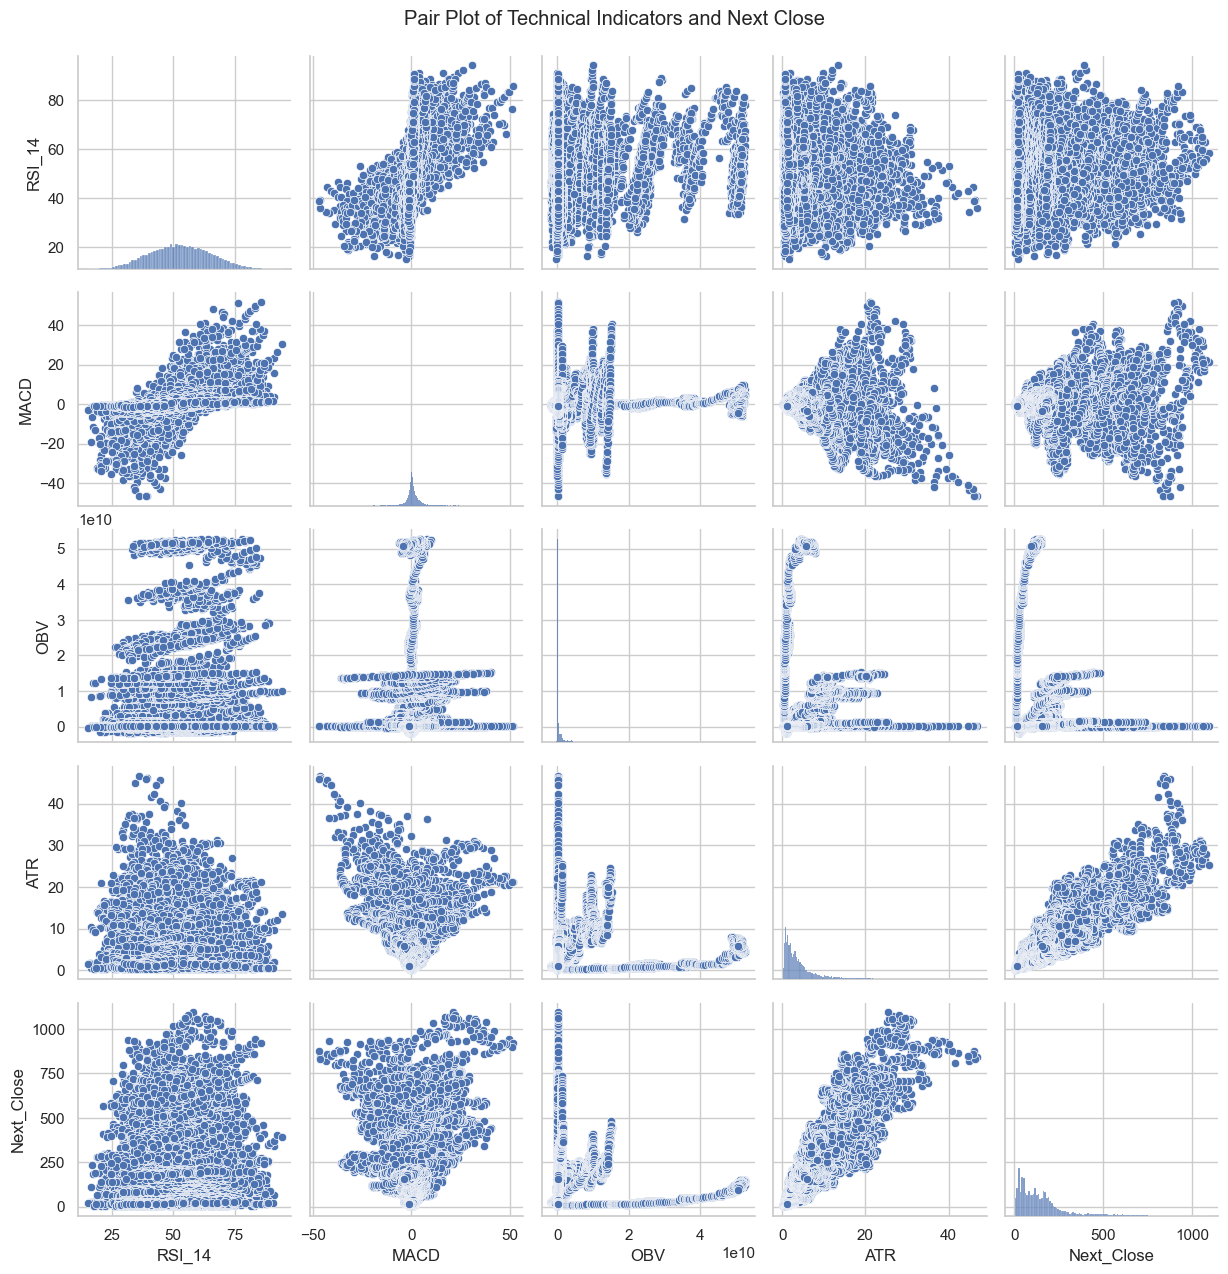

In [14]:
selected_features = ['RSI_14', 'MACD', 'OBV', 'ATR', 'Next_Close']
sns.pairplot(techeng_df[selected_features].dropna())
plt.suptitle('Pair Plot of Technical Indicators and Next Close', y=1.02)
plt.show()


#### 5) Check the Relationship Between Features and the Target
Explore how technical indicators relate to the target (next day’s close). Use scatter plots or group-by summaries to spot patterns.
- **Resource**: [Scatter plot with a grouping variable with Pandas](https://python-graph-gallery.com/537-scatter-plots-grouped-by-color-with-pandas/)

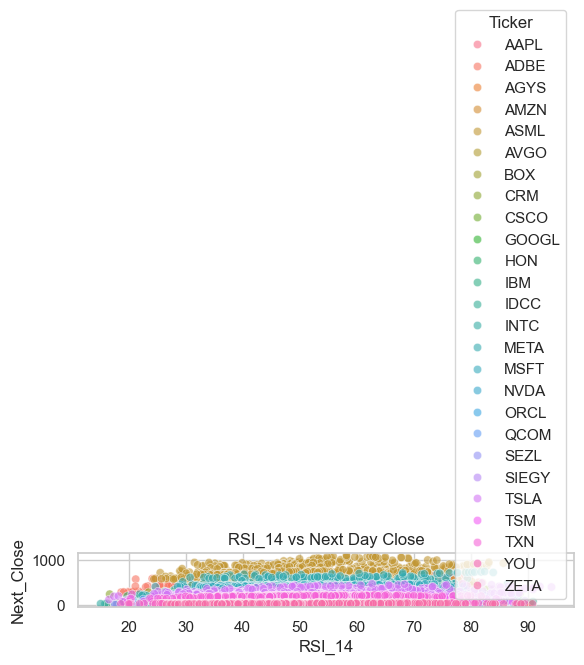

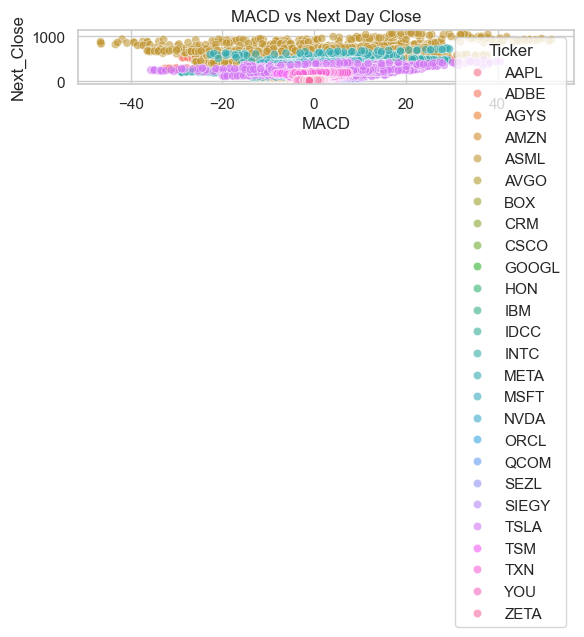

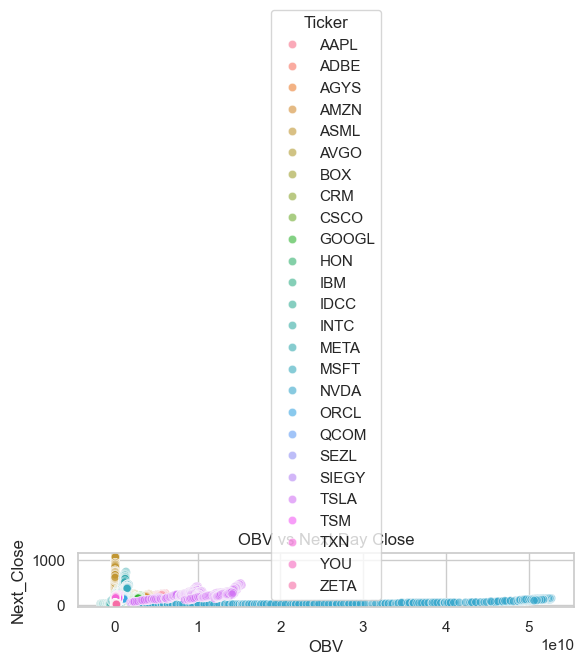

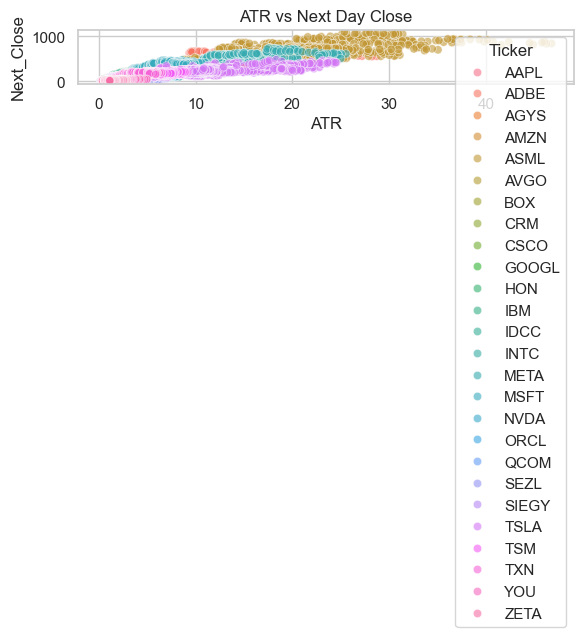

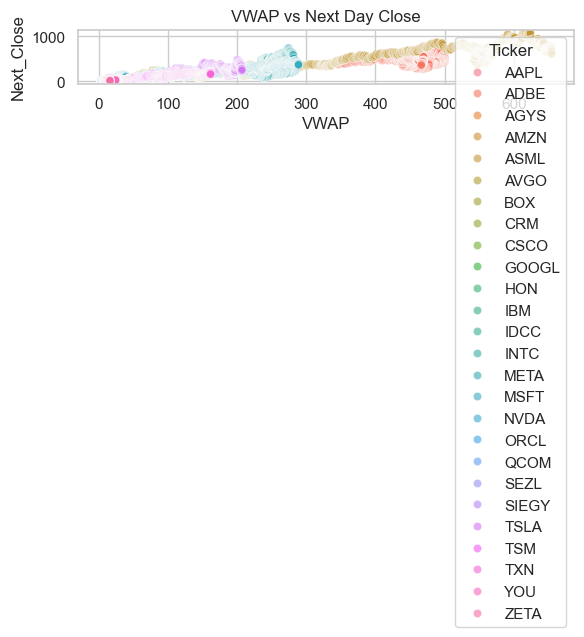

In [15]:
features = ['RSI_14', 'MACD', 'OBV', 'ATR', 'VWAP']

for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=techeng_df, x=feature, y='Next_Close', hue='Ticker', alpha=0.6)
    plt.title(f'{feature} vs Next Day Close')
    plt.tight_layout()
    plt.show()


In [18]:
# Grouping RSI into bins
techeng_df['RSI_Bin'] = pd.cut(techeng_df['RSI_14'], bins=5)
techeng_df.groupby('RSI_Bin')['Next_Close'].mean()


/var/folders/q8/_3grvd5j3v37kz6tcq5hl29w0000gn/T/ipykernel_25227/80139240.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  techeng_df.groupby('RSI_Bin')['Next_Close'].mean()


RSI_Bin
(15.012, 30.913]    136.848608
(30.913, 46.734]    156.265383
(46.734, 62.555]    159.016933
(62.555, 78.377]    174.724252
(78.377, 94.198]    181.796184
Name: Next_Close, dtype: float64

#### 6) Use Boxplots to Detect Outliers
- Boxplots are a great way to spot extreme values or outliers in numeric features. 
- Outliers can influence your model heavily — decide whether to keep, remove, or transform them.
- **Resource**: [How to detect outliers using IQR and Boxplots?](https://www.machinelearningplus.com/machine-learning/how-to-detect-outliers-using-iqr-and-boxplots/)

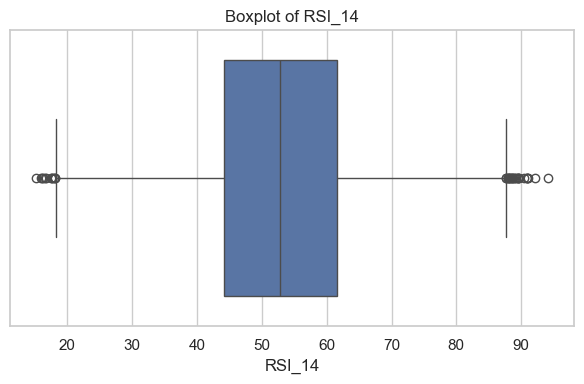

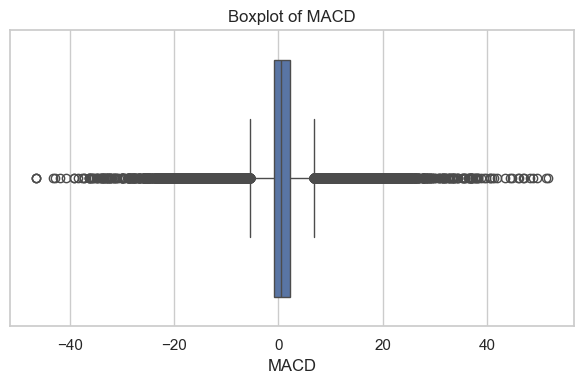

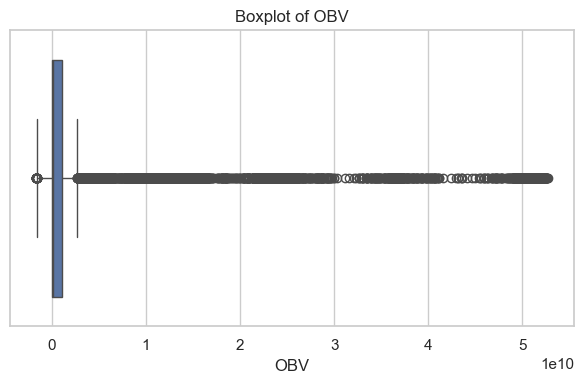

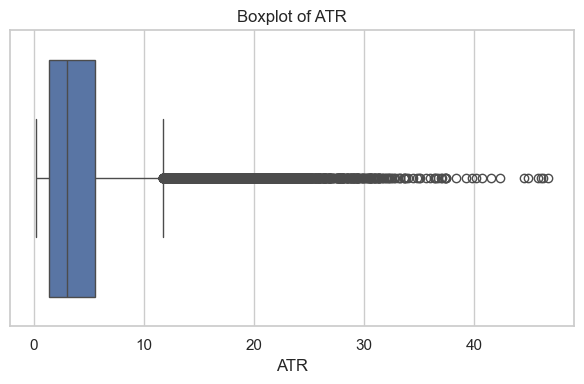

In [19]:
for feature in ['RSI_14', 'MACD', 'OBV', 'ATR']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=techeng_df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
    plt.show()


In [20]:
Q1 = techeng_df['MACD'].quantile(0.25)
Q3 = techeng_df['MACD'].quantile(0.75)
IQR = Q3 - Q1

outliers = techeng_df[(techeng_df['MACD'] < Q1 - 1.5 * IQR) | (techeng_df['MACD'] > Q3 + 1.5 * IQR)]
print(f'MACD Outliers Count: {len(outliers)}')


MACD Outliers Count: 3952


#### 7) Investigate Patterns Over Time or Between Groups (Sector, Ticker, etc.)
- Use time-based plots to see if the target or indicators change by day of the week or over time.
- Grouped boxplots can help reveal differences between companies or sectors.
- **Resource**: [Python Plotting for Exploratory Data Analysis](https://pythonplot.com/)

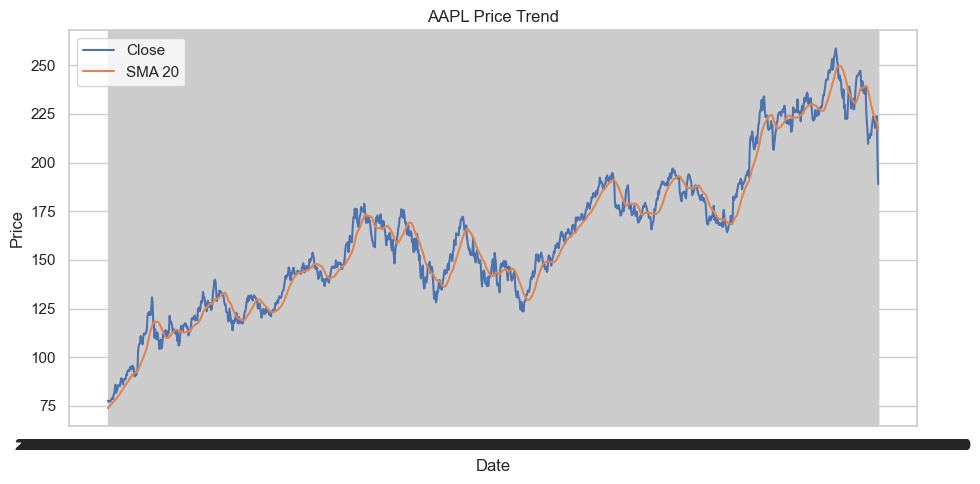

In [21]:
# Trend over time for a specific ticker (e.g., AAPL)
aapl_df = techeng_df[techeng_df['Ticker'] == 'AAPL']

plt.figure(figsize=(10, 5))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close')
plt.plot(aapl_df['Date'], aapl_df['SMA_20'], label='SMA 20')
plt.title('AAPL Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


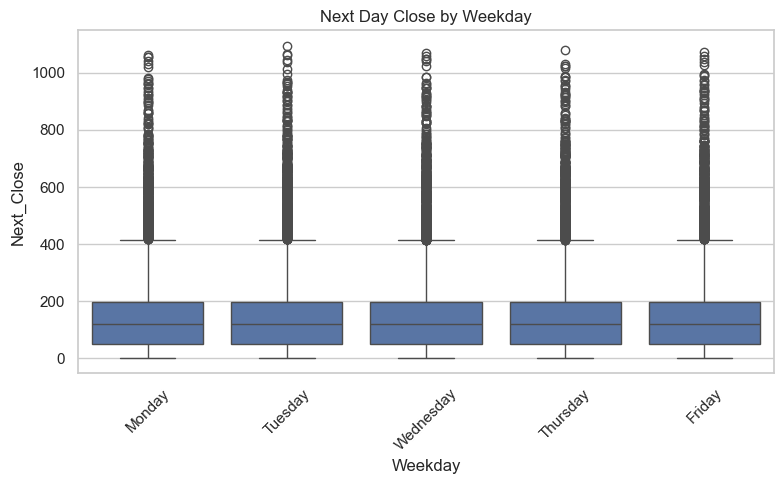

In [24]:
from pandas.api.types import CategoricalDtype

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
techeng_df['Weekday'] = techeng_df['Weekday'].astype(CategoricalDtype(categories=weekday_order, ordered=True))

plt.figure(figsize=(8, 5))
sns.boxplot(data=techeng_df, x='Weekday', y='Next_Close')
plt.title('Next Day Close by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 8) Brainstorm & Engineer New Features Based on Your Insights
- Consider creating features like price range, volatility, lagged prices, or differences from moving averages.
- These can help capture patterns not directly visible in raw features.
- **Resource**: [A Reference Guide to Feature Engineering](https://www.kaggle.com/code/prashant111/a-reference-guide-to-feature-engineering-methods)